Every file is from a network administrator from a specific year.

The columns in each file are:

- net_manager: code of the regional network manager
- purchase_area: code of the area where the energy is purchased
- street: Name of the street
- zipcode_from and zipcode_to: 2 columns for the range of zipcodes covered, 4 numbers and 2 letters
- city: Name of the city
- num_connections: Number of connections in the range of zipcodes
- delivery_perc: percentage of the net consumption of electricity or gas. The lower, the more energy was given back to the grid (for example if you have solar panels)
- perc_of_active_connections: Percentage of active connections in the zipcode range
- type_of_connection: principal type of connection in the zipcode range. For electricity is # fuses X # ampère. For gas is G4, G6, G10, G16, G25
- type_conn_perc: percentage of presence of the principal type of connection in the zipcode range
- annual_consume: Annual consume. Kwh for electricity, m3 for gas
- annual_consume_lowtarif_perc: Percentage of consume during the low tarif hours. From 10 p.m. to 7 a.m. and during weekends.
- smartmeter_perc: percentage of smartmeters in the zipcode ranges

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import random
#import seaborn as sns
#%matplotlib inline

In [56]:
df1 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012009.csv")
df1['year'] = '2009'
df2 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012012.csv")
df2['year'] = '2012'
df3 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012015.csv")
df3['year'] = '2015'
df4 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012018.csv")
df4['year'] = '2018'

In [57]:
df = pd.concat([df1,df2,df3,df4])
df.describe()

,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
count,546339.000000,546339.000000,546339.000000,546339.000000,546339.000000,546339.000000,546339.000000
mean,23.374418,97.194787,94.210489,76.753333,4550.012919,42.599367,14.333556
std,15.680182,7.428644,12.775963,19.169529,3648.819736,30.172475,25.999679
min,6.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000
25%,16.000000,100.000000,93.330000,61.000000,2685.000000,16.670000,0.000000
50%,20.000000,100.000000,100.000000,80.000000,3530.000000,38.100000,0.000000
75%,26.000000,100.000000,100.000000,94.000000,4838.000000,65.520000,15.000000
max,1088.000000,100.000000,100.000000,100.000000,61684.000000,100.000000,100.000000


In [58]:
df[1000:1500]

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
1000,Liander N.V. (NW),Liander NW,Lindengracht,1015KN,1015KN,AMSTERDAM,87,100.0,96.55,94,3x25,2441,4.60,0.0,2009
1001,Liander N.V. (NW),Liander NW,Karthuizersdwarsstraat,1015KP,1015KP,AMSTERDAM,34,100.0,91.18,91,3x25,2559,0.00,0.0,2009
1002,Liander N.V. (NW),Liander NW,Tichelstraat,1015KR,1015KR,AMSTERDAM,25,100.0,68.00,84,3x25,2541,4.00,0.0,2009
1003,Liander N.V. (NW),Liander NW,Tichelstraat,1015KS,1015KS,AMSTERDAM,19,100.0,94.74,89,3x25,2528,0.00,0.0,2009
1004,Liander N.V. (NW),Liander NW,Tichelstraat,1015KT,1015KT,AMSTERDAM,28,100.0,96.43,96,3x25,2838,3.57,0.0,2009
1005,Liander N.V. (NW),Liander NW,Lindenstraat,1015KV,1015KV,AMSTERDAM,57,100.0,96.49,100,3x25,2251,5.26,0.0,2009
1006,Liander N.V. (NW),Liander NW,Lindenstraat,1015KW,1015KW,AMSTERDAM,49,100.0,97.96,100,3x25,1275,0.00,0.0,2009
1007,Liander N.V. (NW),Liander NW,Lindenstraat,1015KX,1015KX,AMSTERDAM,46,100.0,80.43,96,3x25,2732,0.00,0.0,2009
1008,Liander N.V. (NW),Liander NW,Lindenstraat,1015KZ,1015KZ,AMSTERDAM,55,100.0,94.55,100,3x25,2023,3.64,0.0,2009
1009,Liander N.V. (NW),Liander NW,Boomstraat,1015LA,1015LA,AMSTERDAM,39,100.0,94.87,100,3x25,2383,2.56,0.0,2009


In [59]:
Nine = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2009'),'annual_consume']
Twelve = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2012'),'annual_consume']
Fifteen = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2015'), 'annual_consume']
Eighteen = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2018'), 'annual_consume']

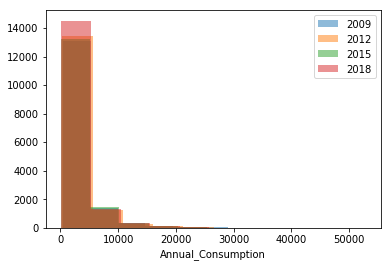

In [60]:
plt.hist(Nine, alpha=.5, label='2009')
plt.hist(Twelve, alpha=.5, label='2012')
plt.hist(Fifteen, alpha=.5, label='2015')
plt.hist(Eighteen, alpha=.5, label='2018')
plt.xlabel('Annual_Consumption')
plt.legend(loc='best')
plt.show()

In [61]:
Nine.reset_index()

,index,annual_consume
0,1,14761
1,2,12139
2,3,5082
3,4,3712
4,5,19837
5,6,3781
6,7,3478
7,8,5395
8,9,10168
9,10,3143


In [62]:
Twelve.reset_index()

,index,annual_consume
0,1,14592
1,2,11278
2,3,4270
3,4,3232
4,5,24266
5,6,5106
6,7,9606
7,8,9133
8,9,6587
9,10,2724


In [63]:
listt = []
for i in range(10):
    diff =  Twelve[i+1] - Nine[i+1] 
    listt.append(diff)

In [64]:
First = pd.DataFrame()
First.reset_index()

,index


In [65]:
d = []
for n in range(10000):
    i = random.randint(1, 130000)
    d.append({'Three_yr_diff':Twelve[i] - Nine[i]})

pd.DataFrame(d)

KeyError: 69978

In [68]:
First = pd.DataFrame()
for n in range(10000):
    i = random.randint(1, 130000)
    diff = pd.DataFrame({'Three_yr_diff':Twelve[i] - Nine[i]})
    First = pd.concat([First, diff])

KeyError: 34269

In [ ]:
First.head()

In [ ]:
Second = pd.DataFrame()

for n in range(10000):
    i = random.randint(0, 130000)
    diff = pd.DataFrame({'Three_yr_diff':Fifteen[i] - Twelve[i]}, index=[i])
    Second = pd.concat([Second, diff])

In [ ]:
Third = pd.DataFrame()

for n in range(10000):
    i = random.randint(0, 130000)
    diff = pd.DataFrame({'Three_yr_diff':Eighteen[i] - Fifteen[i]}, index=[i])
    Third = pd.concat([Third, diff])

In [ ]:
Second.describe()

In [ ]:
plt.hist(First, alpha=.8, label='2009-2012')
plt.hist(Second, alpha=.5, label='2012-2015')
plt.xlabel('Annual_Consumption')
plt.legend(loc='best')
plt.show()

In [ ]:
First = First.reset_index()
First['Timing'] = 1
First.head()

In [ ]:
Second = Second.reset_index()
Second['Timing'] = 2
Second.head()

In [ ]:
Third = Third.reset_index()
Third['Timing'] = 3
Third.head()

In [ ]:
Differences = pd.DataFrame
Differences = pd.concat([First, Second, Third])
Differences

In [ ]:
g = sns.lmplot(y='Three_yr_diff', # Variable 1.
                x='index',# Variable 2.
               data=First, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}), # Set points to semi-transparent to see overlaping points.



plt.title('Scatterplot')
plt.show()
g = sns.lmplot(y='Three_yr_diff', # Variable 1.
                x='index',# Variable 2.
               data=Second, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}), # Set points to semi-transparent to see overlaping points.



plt.title('Scatterplot2')
plt.show()

In [ ]:
sns.set(style="white")

g = sns.lmplot(y='Three_yr_diff', # Variable 1.
                x='index',# Variable 2.
               data=First, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4},
               ci=False,)
g.set_ylabels("diff")
g.set_xlabels("time")
plt.suptitle('First')
plt.subplots_adjust(top=0.9)
plt.show()

g = sns.lmplot(y='Three_yr_diff', # Variable 1.
                x='index',# Variable 2.
               data=Second, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4},
               ci=False, 
               palette='pastel',
               lowess=True) # Using local weighing to fit a line.
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.suptitle('Second')
plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:
plt.hist(First['Three_yr_diff'], alpha=.8, label='2009-2012')
plt.hist(Second['Three_yr_diff'], alpha=.5, label='2012-2015')
plt.hist(Third['Three_yr_diff'], alpha=.5, label='2015-2018')
plt.xlabel('Three Year Difference')
plt.legend(loc='best')
plt.show()

In [ ]:
df1['annual_consume'][0]

In [ ]:
df6

In [ ]:
Nine.describe()

In [ ]:
k = random.randint(0, 130000)
print(k)

Each file contains roughly between 130,000 and 140,000 rows. 
